In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pickle
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
from fbprophet import Prophet
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
#open pkl
with open('sensor_data.pkl', 'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data)
df.dropna(inplace = True) 
df = df.reset_index()
df = df.rename(columns={'date':'ds', 'Output': 'y'})

In [ ]:
df.head()

,ds,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,y
0,2019-12-01 20:15:00,0.0,46.999207,54.409090,727.719907,15.693373,59.600000,59.5800,1.422936,90.509259,83.839699,4.199942,3.548900,3.732175,188.086971,35.860340,161.349826,73.914931,143.292721,87.434896,69.377790,0.458104,0.515832,0.000000
1,2019-12-01 20:30:00,0.0,46.999207,54.545455,727.719907,14.633970,84.344325,81.9275,1.429543,88.006366,94.138214,4.207176,3.572049,3.787616,188.078704,35.841049,163.320312,78.456597,140.979456,84.863715,62.522859,0.480385,0.556511,0.000000
2,2019-12-01 20:45:00,0.0,46.999673,54.454546,727.777778,16.210609,89.286667,89.3750,1.433111,81.481481,76.654731,4.168113,3.530937,3.746263,188.155864,35.734954,156.406250,78.057292,146.038773,78.348958,67.981481,0.499068,0.534497,0.000000
3,2019-12-01 21:00:00,0.0,47.288057,54.363635,729.728350,16.355613,84.443333,84.4100,1.440972,75.053048,55.931713,4.131944,3.573495,4.429832,188.634259,34.191744,161.179832,75.338542,143.236400,85.841291,67.897859,0.467419,0.525973,5.043403
4,2019-12-01 21:15:00,0.0,47.146217,54.272724,728.877315,24.717882,88.221667,88.3800,1.441683,68.610147,59.892940,4.108796,3.547936,4.440208,188.148148,34.012277,158.629919,74.448661,144.024884,84.181258,69.576224,0.469323,0.516915,7.104311


In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
train_size = int(len(df) * 0.85)
train = df[:train_size]
validate = df[train_size:]
# train = train[['ds', 'y']]
# test = test[['ds', 'y']]

In [ ]:
m = Prophet(yearly_seasonality=True)
# m.add_regressor('Col0')
# m.add_regressor('Col1')
# m.add_regressor('Col2')
# m.add_regressor('Col3')
# m.add_regressor('Col4')
# m.add_regressor('Col5')
m.add_regressor('Col6')
# m.add_regressor('Col7')
# m.add_regressor('Col8')
m.add_regressor('Col9')
# m.add_regressor('Col10')
m.add_regressor('Col11')
# m.add_regressor('Col12')
# m.add_regressor('Col13')
# m.add_regressor('Col14')
# m.add_regressor('Col15')
m.add_regressor('Col16')
m.add_regressor('Col17')
# m.add_regressor('Col18')
m.add_regressor('Col19')
m.add_regressor('Col20')
# m.add_regressor('Col21')

In [ ]:
m.fit(train)
p = validate.shape[0]
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [ ]:
# future['Col0'] = validate['Col0'].values
# future['Col1'] = validate['Col1'].values
# future['Col2'] = validate['Col2'].values
# future['Col3'] = validate['Col3'].values
# future['Col4'] = validate['Col4'].values
# future['Col5'] = validate['Col5'].values
future['Col6'] = validate['Col6'].values
# future['Col7'] = validate['Col7'].values
# future['Col8'] = validate['Col8'].values
future['Col9'] = validate['Col9'].values
# future['Col10'] = validate['Col10'].values
future['Col11'] = validate['Col11'].values
# future['Col12'] = validate['Col12'].values
# future['Col13'] = validate['Col13'].values
# future['Col14'] = validate['Col14'].values
# future['Col15'] = validate['Col15'].values
future['Col16'] = validate['Col16'].values
future['Col17'] = validate['Col17'].values
# future['Col18'] = validate['Col18'].values
future['Col19'] = validate['Col19'].values
future['Col20'] = validate['Col20'].values
# future['Col21'] = validate['Col21'].values
forecast = m.predict(future)

In [ ]:
timeseries_evaluation_metrics_func(test.y,forecast.yhat)

MSE is : 5.45117459506537
MAE is : 1.1485103931553546
RMSE is : 2.334775063055405
R2 is : -0.06699071768321407



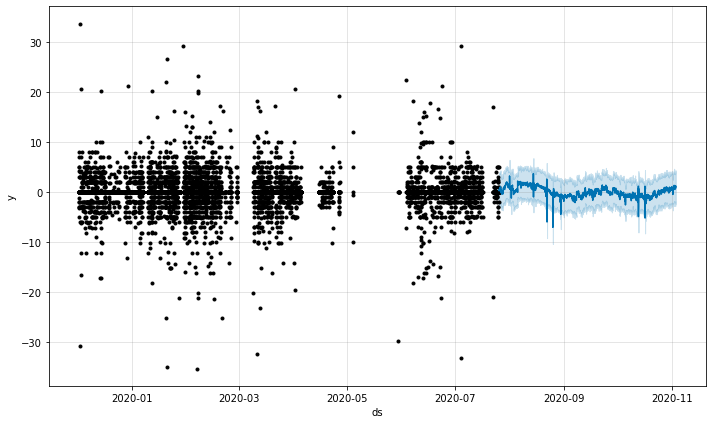

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
timeseries_evaluation_metrics_func(test.y,np.zeros(2396))

MSE is : 5.1089329321150565
MAE is : 0.7265143753284796
RMSE is : 2.260294877248333
R2 is : -1.7282087223513543e-06



In [ ]:
test.head()

,ds,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,y
13575,2020-07-26 02:00:00,0.0,58.067781,56.060605,756.655093,66.406250,8.4,64.545,1.481409,79.991319,49.792631,6.584201,3.121685,4.482370,189.814815,44.917052,7.364005,94.348958,157.126736,-86.984954,62.777778,12.812181,0.600464,0.0
13576,2020-07-26 02:15:00,0.0,57.752708,56.045454,756.076389,72.659708,8.4,64.545,1.475405,75.917486,37.919560,6.584201,3.104745,4.369454,189.791667,44.652778,220.106337,95.833333,147.533275,124.273003,51.699942,0.435396,0.649571,0.0
13577,2020-07-26 02:30:00,0.0,57.161949,55.954546,754.991319,74.712378,8.4,64.545,1.466532,71.770833,39.351852,6.576003,3.079016,4.366319,189.641204,44.593943,206.698909,105.433408,149.609375,101.265501,44.175967,0.510082,0.704725,0.0
13578,2020-07-26 02:45:00,0.0,56.492420,55.909092,753.761574,77.883873,8.4,64.545,1.455343,68.272569,40.075231,6.562913,3.087240,4.359086,189.377894,44.581370,206.655093,99.822917,155.512153,106.832176,55.689236,0.483041,0.641898,0.0
13579,2020-07-26 03:00:00,0.0,58.769355,55.863638,757.943697,85.221354,8.4,64.545,1.455729,74.218750,64.330150,6.578897,3.139468,4.500868,189.907407,45.028935,200.101273,97.492560,145.058284,102.608714,47.565724,0.487216,0.672092,0.0


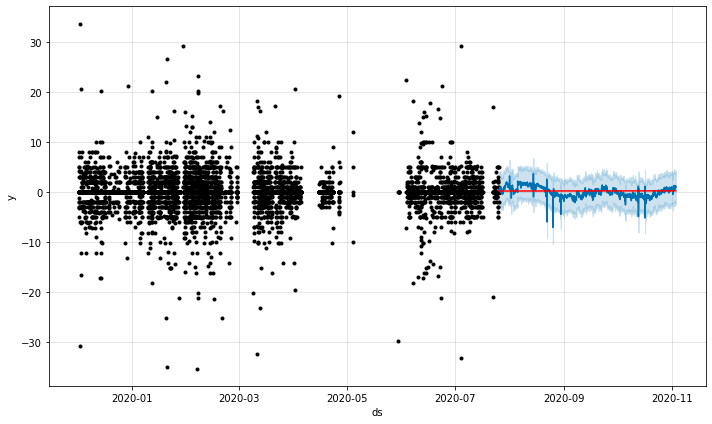

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

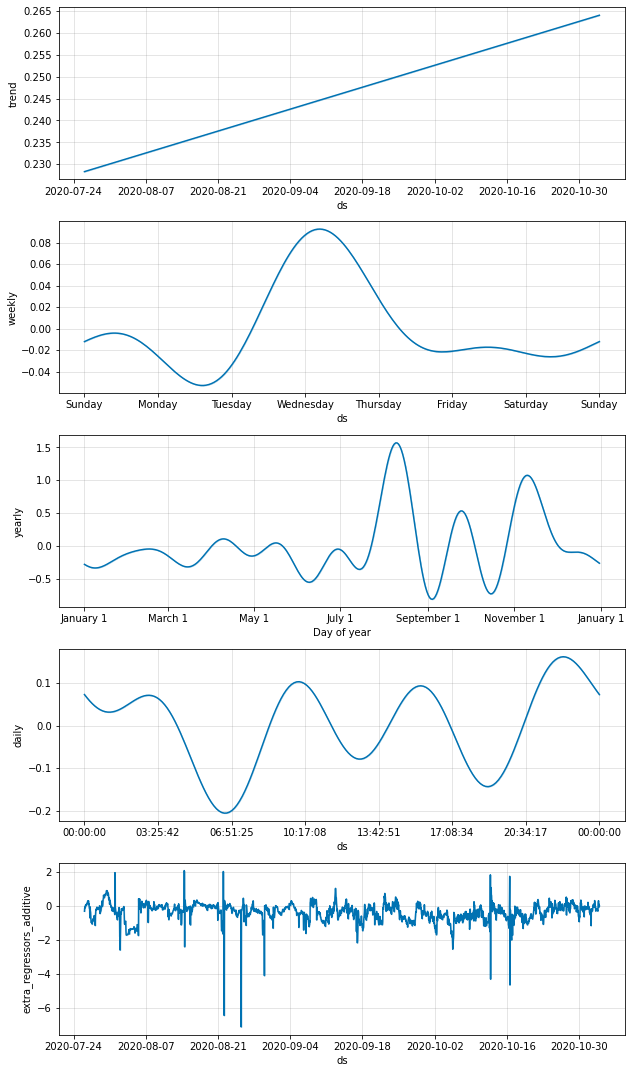

In [ ]:
fig2 = m.plot_components(forecast)